#1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
a. Построить точечный график\
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена\
c. Построить модель линейной регрессии\
d. Рассчитать коэффициент детерминации\
e. Вывести график остатков

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


##a. Построить точечный график

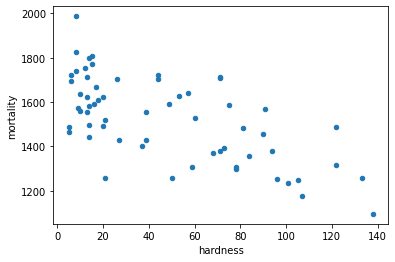

In [ ]:
df.plot(kind='scatter', x='hardness', y='mortality')

##b. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [ ]:
# считаем коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


##c. Построить модель линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['hardness']]
y = df['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) # подбор оптимальных коэффициентов

LinearRegression()

In [ ]:
model.coef_ # a

array([-3.13167087])

In [ ]:
model.intercept_ # b

1668.9722977277095

In [ ]:
# y = -3.13x + 1668.97

In [ ]:
y_pred = model.predict(X_test) # прогноз на входящих данных
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

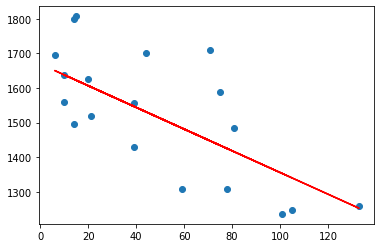

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# линия регрессии и фактические значения

##d. Рассчитать коэффициент детерминации

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

Чем ближе значение коэффициента к 1, тем сильнее зависимость. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50%.

##e. Вывести график остатков

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           7.83e-06
Time:                        11:00:14   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

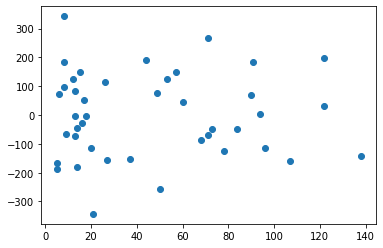

In [ ]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <a list of 20 Patch objects>)

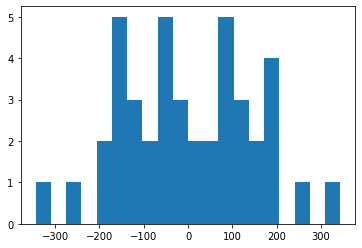

In [ ]:
plt.hist(results.resid, bins=20)

#2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
a. Разделить данные на 2 группы\
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

##a. Разделить данные на 2 группы

In [ ]:
df_south = df.loc[df['location'] == 'South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [ ]:
df_north = df.loc[df['location'] == 'North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


##b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности
##Южные города

###a. Построить точечный график

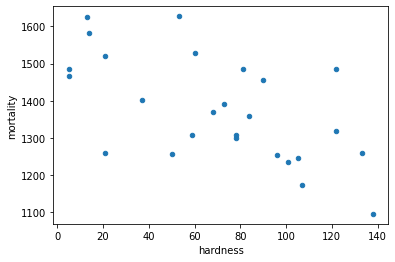

In [ ]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

###b. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [ ]:
# считаем коэф. корреляции Пирсона
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


###c. Построить модель линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df_south[['hardness']]
y = df_south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) # подбор оптимальных коэффициентов

LinearRegression()

In [ ]:
model.coef_ # a

array([-3.51342921])

In [ ]:
model.intercept_ # b

1640.2204603423374

In [ ]:
# y = -3.13x + 1668.97  --- по всем городам
# y = -3.51x + 1640.22  --- по южным

In [ ]:
y_pred = model.predict(X_test) # прогноз на входящих данных
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

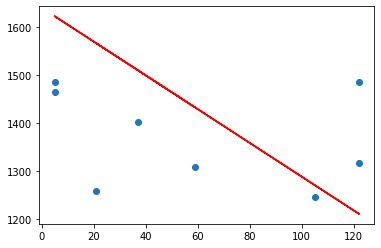

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# линия регрессии и фактические значения

###d. Рассчитать коэффициент детерминации

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.5519223012352077

Отрицательное значение коэффициента говорит о том, что построенная модель хуже чем "наивная" (простое усреднение).

###e. Вывести график остатков

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           7.30e-05
Time:                        10:51:00   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


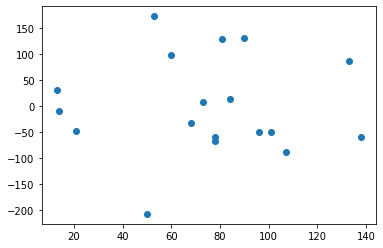

In [ ]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 0., 0., 0., 1., 3., 3., 1., 1., 2., 1., 0., 0., 1., 1.,
        2., 0., 1.]),
 array([-207.54899972, -188.52198534, -169.49497096, -150.46795658,
        -131.4409422 , -112.41392781,  -93.38691343,  -74.35989905,
         -55.33288467,  -36.30587029,  -17.2788559 ,    1.74815848,
          20.77517286,   39.80218724,   58.82920162,   77.856216  ,
          96.88323039,  115.91024477,  134.93725915,  153.96427353,
         172.99128791]),
 <a list of 20 Patch objects>)

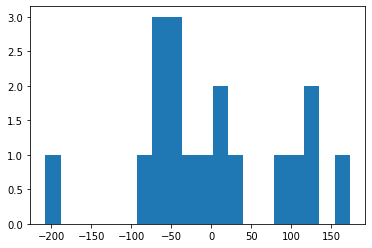

In [ ]:
plt.hist(results.resid, bins=20)

##Северные города

###a. Построить точечный график

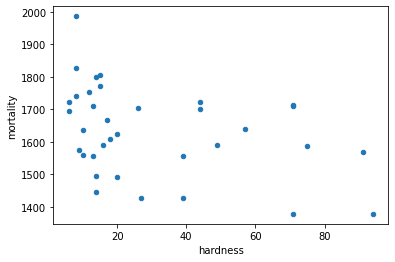

In [ ]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

###b. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [ ]:
# считаем коэф. корреляции Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


###c. Построить модель линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df_north[['hardness']]
y = df_north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) # подбор оптимальных коэффициентов

LinearRegression()

In [ ]:
model.coef_ # a

array([-1.97686226])

In [ ]:
model.intercept_ # b

1688.150229031281

In [ ]:
# y = -3.13x + 1668.97  --- по всем городам
# y = -3.51x + 1640.22  --- по южным
# y = -1.98x + 1688.15  --- по северным

In [ ]:
y_pred = model.predict(X_test) # прогноз на входящих данных
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

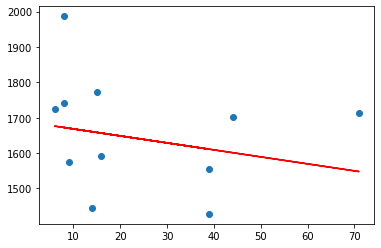

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# линия регрессии и фактические значения

###d. Рассчитать коэффициент детерминации

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

Значение коэффициента близкое к 0 говорит о том, что построенная модель схожа с "наивной" (простое усреднение).

###e. Вывести график остатков

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sun, 15 Jan 2023   Prob (F-statistic):             0.0316
Time:                        10:57:41   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

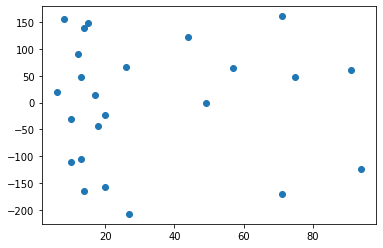

In [ ]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 3., 0., 1., 2., 0., 0., 1., 2., 0., 2., 1., 2., 3., 0., 1.,
        1., 1., 3.]),
 array([-207.77494801, -189.32585104, -170.87675407, -152.42765709,
        -133.97856012, -115.52946315,  -97.08036618,  -78.6312692 ,
         -60.18217223,  -41.73307526,  -23.28397829,   -4.83488132,
          13.61421566,   32.06331263,   50.5124096 ,   68.96150657,
          87.41060354,  105.85970052,  124.30879749,  142.75789446,
         161.20699143]),
 <a list of 20 Patch objects>)

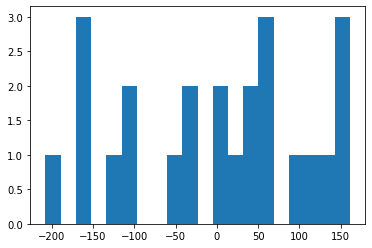

In [ ]:
plt.hist(results.resid, bins=20)

#Вывод:
При анализе общего набора данных, можно придти к выводу о зависимости между смертностью населения и жесткостью воды в регионе. Но аналогичная зависимость не сохраняется для для северных и южных городов по отдельности, и эти модели получились не приемлимыми. А так как это части одного набора данных, то и выводы о зависимости смертности от жесткости воды будут ошибочными.